In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%204%20-%20Lesson%202%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
# importing libraries.
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [82]:
tokenizer = Tokenizer()# here we are doing tokenization of the dataset.

data = open('dataset2.txt').read()
# loading the dataset.


corpus = data.lower().split("<eos>") #splitting the dataset


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1 # tokenizu=ing it

print(tokenizer.word_index)
print(total_words)


{'the': 1, 'and': 2, 'of': 3, 'to': 4, 'in': 5, 'a': 6, 'that': 7, 'i': 8, 'with': 9, 'my': 10, "'s": 11, 'his': 12, 'all': 13, 'for': 14, 'but': 15, 'from': 16, 'her': 17, 'thy': 18, 'is': 19, 'as': 20, 'on': 21, "'d": 22, 'he': 23, 'me': 24, 'not': 25, 'their': 26, 'so': 27, 'this': 28, 'by': 29, 'love': 30, 'thou': 31, 'or': 32, 'be': 33, 'it': 34, '—': 35, 'yet': 36, 'when': 37, 'they': 38, 'we': 39, 'no': 40, 'like': 41, '’': 42, 'which': 43, 'our': 44, 'at': 45, 'you': 46, 'are': 47, 'was': 48, 'if': 49, 'she': 50, 'then': 51, 'more': 52, '“': 53, 'what': 54, 'thee': 55, 'who': 56, 'have': 57, 'now': 58, 'heart': 59, 'nor': 60, 'one': 61, '‘': 62, 'some': 63, 'where': 64, 'your': 65, 'still': 66, 'shall': 67, 'may': 68, 'life': 69, 'will': 70, 'day': 71, 'there': 72, 'them': 73, 'eyes': 74, 'than': 75, 'did': 76, 'him': 77, 'o': 78, 'its': 79, 'soul': 80, 'can': 81, 'world': 82, 'these': 83, 'had': 84, 'whose': 85, 'thus': 86, 'see': 87, 'those': 88, 'time': 89, 'through': 90, 'm

In [83]:
courpus = []
for line in corpus:
  corpus2 = line. replace("\n", " ") #Modify old string.
  courpus.append(corpus2) #Add new string to list.
print(courpus)
  

['let us forget . what matters it that we ', " once reigned o'er happy realms of long ago ", ' and talked of love , and let our voices low ', ' and ruled for some brief sessions royally ', ' what if we sung , or laughed , or wept maybe ', ' it has availed not anything , and so ', ' let it go by that we may better know ', ' how poor a thing is lost to you and me ', ' but yesterday i kissed your lips , and yet ', ' did thrill you not enough to shake the dew ', ' from your drenched lids — and missed , with no regret ', ' your kiss shot back , with sharp breaths failing you ', ' and so , to day , while our worn eyes are wet ', ' with all this waste of tears , let us forget ', ' the hills are gleaming brass , and bronze the peaks ', ' the mesas are a brazen , molten sea ', " and e'en the heaven 's blue infinity ", ' undimmed by kindly cloud through arid weeks ', ' seems polished turquoise . like a sphinx she speaks ', " the scornful desert : “ what would'st thou from me ", ' and in our hear

In [84]:
x = len(courpus)
x

4691

In [85]:
# splitting dataset  into twon parts for training and testing

train_courpus = courpus[:4300] #Training dataset
test_courpus = courpus[4301:] # testing dataset

In [86]:
# applying the n-gram technique 
input_sequences = []
for line in train_courpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# creating predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [87]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'of': 3, 'to': 4, 'in': 5, 'a': 6, 'that': 7, 'i': 8, 'with': 9, 'my': 10, "'s": 11, 'his': 12, 'all': 13, 'for': 14, 'but': 15, 'from': 16, 'her': 17, 'thy': 18, 'is': 19, 'as': 20, 'on': 21, "'d": 22, 'he': 23, 'me': 24, 'not': 25, 'their': 26, 'so': 27, 'this': 28, 'by': 29, 'love': 30, 'thou': 31, 'or': 32, 'be': 33, 'it': 34, '—': 35, 'yet': 36, 'when': 37, 'they': 38, 'we': 39, 'no': 40, 'like': 41, '’': 42, 'which': 43, 'our': 44, 'at': 45, 'you': 46, 'are': 47, 'was': 48, 'if': 49, 'she': 50, 'then': 51, 'more': 52, '“': 53, 'what': 54, 'thee': 55, 'who': 56, 'have': 57, 'now': 58, 'heart': 59, 'nor': 60, 'one': 61, '‘': 62, 'some': 63, 'where': 64, 'your': 65, 'still': 66, 'shall': 67, 'may': 68, 'life': 69, 'will': 70, 'day': 71, 'there': 72, 'them': 73, 'eyes': 74, 'than': 75, 'did': 76, 'him': 77, 'o': 78, 'its': 79, 'soul': 80, 'can': 81, 'world': 82, 'these': 83, 'had': 84, 'whose': 85, 'thus': 86, 'see': 87, 'those': 88, 'time': 89, 'through': 90, 'm

In [88]:
# here we are training our dataset

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=30, verbose=1)
#print model.summary()
print(model)


Epoch 1/30
970/970 [==============================] - 25s 26ms/step - loss: 7.3877 - accuracy: 0.0529
Epoch 2/30
970/970 [==============================] - 26s 27ms/step - loss: 6.6954 - accuracy: 0.0684
Epoch 3/30
970/970 [==============================] - 30s 31ms/step - loss: 6.1433 - accuracy: 0.0859
Epoch 4/30
970/970 [==============================] - 30s 31ms/step - loss: 5.4776 - accuracy: 0.1109
Epoch 5/30
970/970 [==============================] - 30s 31ms/step - loss: 4.7729 - accuracy: 0.1574
Epoch 6/30
970/970 [==============================] - 29s 29ms/step - loss: 4.1102 - accuracy: 0.2257
Epoch 7/30
970/970 [==============================] - 29s 29ms/step - loss: 3.5919 - accuracy: 0.2894
Epoch 8/30
970/970 [==============================] - 30s 31ms/step - loss: 3.1981 - accuracy: 0.3420
Epoch 9/30
970/970 [==============================] - 30s 31ms/step - loss: 2.9219 - accuracy: 0.3833
Epoch 10/30
970/970 [==============================] - 29s 30ms/step - loss: 2.695

In [89]:
import matplotlib.pyplot as plt

#Plotting the accuracy vs Epochs

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

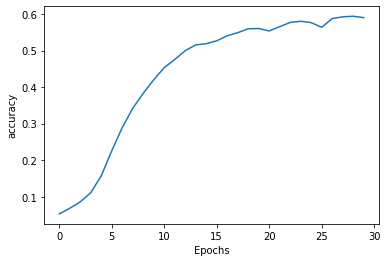

In [90]:
plot_graphs(history, 'accuracy')


In [91]:
a=0

In [92]:

a=a + 13
seed_word = test_courpus[a]    # now we are testing our model using the testing dataset we have created early in the model.
seed_word

seed_text = seed_word #This the starting text of our poem 
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]     
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)
sonnet = seed_text


 in which they would the records have enrold  affords thick fate and bold grown to è elders though the tis of fame to be breath rise your of fear of conqu'ring kings of fail of trumpets 'd adhered happiest that of day of day in over objects a dream desolate took his we run glittering like his draughty smells conceal 'd thine eyes of fail of new 'd his feet we come of day brain said in his blood be like is fair in strife of day of nectar flow of those of jericho be pass of death so orient of fear of fate and parted to which


In [93]:
sonnet # output inthe form of paragraph

" in which they would the records have enrold  affords thick fate and bold grown to è elders though the tis of fame to be breath rise your of fear of conqu'ring kings of fail of trumpets 'd adhered happiest that of day of day in over objects a dream desolate took his we run glittering like his draughty smells conceal 'd thine eyes of fail of new 'd his feet we come of day brain said in his blood be like is fair in strife of day of nectar flow of those of jericho be pass of death so orient of fear of fate and parted to which"

In [94]:
import numpy as np
b = sonnet.split()
y=np.size(b)
z = round(y/14,0)                 # Converting the paragraph into a proper sonnet.
k=int(np.size(b)/z)


for i in  range(k):
  for j in range(14):
    print(b[j+i],end=" ")

  print()
  

in which they would the records have enrold affords thick fate and bold grown 
which they would the records have enrold affords thick fate and bold grown to 
they would the records have enrold affords thick fate and bold grown to è 
would the records have enrold affords thick fate and bold grown to è elders 
the records have enrold affords thick fate and bold grown to è elders though 
records have enrold affords thick fate and bold grown to è elders though the 
have enrold affords thick fate and bold grown to è elders though the tis 
enrold affords thick fate and bold grown to è elders though the tis of 
affords thick fate and bold grown to è elders though the tis of fame 
thick fate and bold grown to è elders though the tis of fame to 
fate and bold grown to è elders though the tis of fame to be 
and bold grown to è elders though the tis of fame to be breath 
bold grown to è elders though the tis of fame to be breath rise 
